# Descriptivas SSEE

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# path="C:/Users/especialistaopep/OneDrive - Ministerio de Educación/Documentos/1 Quick wins + Agenda estratégica 2022/UPP/Equipo plazas/P2. IA Racio/"
path="D:/OneDrive - Ministerio de Educación/Documentos/1 Quick wins + Agenda estratégica 2022/UPP/Equipo plazas/P2. IA Racio/"

base=pd.read_csv(path+'Base consolidada v2.csv')
base = base.drop(base[base.cod_mod=='S150205'].index)
base.head()

D:\Programas\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,33,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Unnamed: 0.1,cod_mod,codlocal,dir_nom,dir_vac,sub_dir_nom,sub_dir_vac,jer_nom,jer_vac,...,d_prov,d_dist,region,jec,ruralidad,vraem,frontera,bilingue,caracteristica,year
0,0,0,2212,427658.0,0,0,0,0,0,0,...,HUANCABAMBA,HUARMACA,PIURA,JEC,Rural 1,No Vraem,No frontera,No bilingue,Completo,2016
1,1,1,200014,53828.0,0,0,0,0,0,0,...,GRAU,CHUQUIBAMBILLA,APURIMAC,NaN,Rural 2,No Vraem,No frontera,Bilingue,Multigrado,2016
2,2,2,200022,53833.0,0,0,0,0,0,0,...,GRAU,CHUQUIBAMBILLA,APURIMAC,NaN,Rural 2,No Vraem,No frontera,Bilingue,Unidocente,2016
3,3,3,200030,53847.0,0,0,0,0,0,0,...,GRAU,CHUQUIBAMBILLA,APURIMAC,NaN,Rural 2,No Vraem,No frontera,Bilingue,Multigrado,2016
4,4,4,200048,53852.0,0,0,0,0,0,0,...,GRAU,CHUQUIBAMBILLA,APURIMAC,NaN,Rural 2,No Vraem,No frontera,Bilingue,Multigrado,2016


In [3]:
# Nombres de columnas
my_list = list(base)
print (my_list)

['Unnamed: 0', 'Unnamed: 0.1', 'cod_mod', 'codlocal', 'dir_nom', 'dir_vac', 'sub_dir_nom', 'sub_dir_vac', 'jer_nom', 'jer_vac', 'doc_nom', 'doc_vac', 'otro_doc_nom', 'otro_doc_vac', 'aux_nom', 'aux_vac', 'cant0 (t)', 'cant1 (t)', 'cant2 (t)', 'cant3 (t)', 'cant4 (t)', 'cant5 (t)', 'cant6 (t)', 'secciones_necesarias', 'req_dir', 'req_sub', 'req_jer', 'req_prof', 'req_aux', 'req_fisica', 'req_aip', 'niv_mod', 'd_niv_mod', 'd_dpto', 'd_prov', 'd_dist', 'region', 'jec', 'ruralidad', 'vraem', 'frontera', 'bilingue', 'caracteristica', 'year']


Dato: Alumnos en matrícula
- Inicial: 0 es alumnos en cuna y 5 es alumnos de 5 años. La categoria 6 deberia ser missing
- Primaria: 0 no existe. Del 1 al 6 es lo usual en primaria
- Secundaria: Solo esa del 1 al 5. El 0 y el 6 deben ser missing

** Recordar que en cada proceso se recoge información de hasta 3 periodos anteriores

In [4]:
# Se hicieron ajustes sobre la BD consolidada:
base['year'] = base['year'].replace([2019],2021)
base['year'] = base['year'].replace([2017],2020)
base['year'] = base['year'].replace([2016],2019)

In [6]:
#base.loc[(base['niv_mod']=="F0"), 'year'].value_counts()
#base.loc['niv_mod'=="F0"])base['secciones_norma'].value_counts()

base['ruralidad'].value_counts()

Rural 1    75468
Rural 2    50776
Urbano     44294
Rural 3    22189
Name: ruralidad, dtype: int64

In [7]:
base.head()
print(base['cod_mod'].isnull().sum())

0


In [8]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192727 entries, 0 to 192727
Data columns (total 44 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            192727 non-null  int64  
 1   Unnamed: 0.1          192727 non-null  int64  
 2   cod_mod               192727 non-null  object 
 3   codlocal              128301 non-null  float64
 4   dir_nom               192727 non-null  int64  
 5   dir_vac               192727 non-null  int64  
 6   sub_dir_nom           192727 non-null  int64  
 7   sub_dir_vac           192727 non-null  int64  
 8   jer_nom               192727 non-null  int64  
 9   jer_vac               192727 non-null  int64  
 10  doc_nom               192727 non-null  int64  
 11  doc_vac               192727 non-null  int64  
 12  otro_doc_nom          192727 non-null  int64  
 13  otro_doc_vac          192727 non-null  int64  
 14  aux_nom               192727 non-null  int64  
 15  

## ¿Qué servicio no sigue la norma? ¿por qué?

In [9]:
## Hallamos los alumnos iniciales, según cuadro N°6 de la norma de racio:

base['alumnos_norma']=0

# Inicial + polidocente + rural
base.loc[((base['niv_mod']=="A1")|(base['niv_mod']=="A2")|(base['niv_mod']=="A3"))&(base['ruralidad']!="Urbano")&(base['caracteristica']=="Completo"), 'alumnos_norma'] = 20

# Inicial + unidocente + rural
base.loc[((base['niv_mod']=="A1")|(base['niv_mod']=="A2")|(base['niv_mod']=="A3"))&(base['ruralidad']!="Urbano")&(base['caracteristica']=="Unidocente"), 'alumnos_norma' ] = 15

# Inicial + polidocente + urbano
base.loc[((base['niv_mod']=="A1")|(base['niv_mod']=="A2")|(base['niv_mod']=="A3"))&(base['ruralidad']=="Urbano"), 'alumnos_norma' ] = 25

# Primaria + polidocente completo + rural
base.loc[(base['niv_mod']=="B0")&(base['ruralidad']!="Urbano")&(base['caracteristica']=="Completo"), 'alumnos_norma' ] = 25

# Primaria + polidocente multigrado + rural
base.loc[(base['niv_mod']=="B0")&(base['ruralidad']!="Urbano")&(base['caracteristica']=="Multigrado"), 'alumnos_norma' ] = 20

# Primaria + unidocente + rural
base.loc[(base['niv_mod']=="B0")&(base['ruralidad']!="Urbano")&(base['caracteristica']=="Unidocente"), 'alumnos_norma' ] = 15

# Primaria + polidocente completo + urbano
base.loc[(base['niv_mod']=="B0")&(base['ruralidad']=="Urbano")&(base['caracteristica']=="Completo"), 'alumnos_norma' ] = 30

# Primaria + polidocente multigrado + urbano
base.loc[(base['niv_mod']=="B0")&(base['ruralidad']=="Urbano")&(base['caracteristica']=="Multigrado"), 'alumnos_norma' ] = 25

# Secundaria + polidocente completo + rural
base.loc[(base['niv_mod']=="F0")&(base['ruralidad']!="Urbano"), 'alumnos_norma' ] = 25

# Secundaria + polidocente completo + urbano
base.loc[(base['niv_mod']=="F0")&(base['ruralidad']=="Urbano"), 'alumnos_norma' ] = 30

In [11]:
## Ya tenemos los alumnos, ahora hallamos las secciones. Hacemos un bucle por cada # de grado (del 1 al 6):

base['secciones_norma']=0
base['np_secciones_norma'] = np.array(base['secciones_norma'])
base['np_alumnos_norma'] = np.array(base['alumnos_norma'])

for x in range(0, 7):
    base['np_cant{x} (t)'] = np.array(base[f'cant{x} (t)'])
    base[f'secciones_norma_{x}'] = (base['np_cant{x} (t)']) / base[f'np_alumnos_norma']
    base.replace([np.inf, -np.inf],np.nan, inplace=True) 
    #base[base[f'secciones_norma_{x}'] == inf] = 0
    base[f'secciones_norma_{x}'] = base[f'secciones_norma_{x}'].fillna(0)
    #np.ceil(base[f'secciones_norma_{x}']).astype("int64") 
    base[f'secciones_norma_{x}'] = base[f'secciones_norma_{x}'].apply(lambda X: int(math.ceil(X)))
    #base[f'secciones_norma_{x}'] = math.ceil(base[f'secciones_norma_{x}'])
    base[f'np_secciones_norma'] = base[f'np_secciones_norma'] + base[f'secciones_norma_{x}']

In [12]:
# Hallamos la diferencia entre las necesarias (reales) - las establecidas por la norma
base['np_secciones_necesarias'] = np.array(base['secciones_necesarias'])
base['secciones_ajuste']=base['secciones_necesarias']-base['np_secciones_norma']


## DISTRIBUCIÓN PARA INICIAL: 

In [13]:
#Intervalo de diferencia de ajuste por grado
    
import math

base_subset = base.loc[(base['niv_mod']=="A1")|(base['niv_mod']=="A2")|(base['niv_mod']=="A3")] 
# De -3.5 a 0.3 secciones faltantes/adicionales. Mayormente faltan secciones.

k = 1 + 3.322 * math.log10(len(base_subset['secciones_ajuste']))
periodos = math.ceil(k)

inf = base_subset['secciones_ajuste'].min()        # Limite inferior del primer intervalo
dif = base_subset['secciones_ajuste'].max()
sup = base_subset['secciones_ajuste'].max()        # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(base_subset['secciones_ajuste'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[-23.0, -19.11764705882353)",4,-21.058824,-23.000000,-19.117647
"[-19.11764705882353, -15.235294117647058)",2,-17.176471,-19.117647,-15.235294
"[-15.235294117647058, -11.352941176470589)",10,-13.294118,-15.235294,-11.352941
"[-11.352941176470589, -7.470588235294118)",35,-9.411765,-11.352941,-7.470588
"[-7.470588235294118, -3.5882352941176485)",357,-5.529412,-7.470588,-3.588235
"[-3.5882352941176485, 0.2941176470588225)",61333,-1.647059,-3.588235,0.294118
"[0.2941176470588225, 4.1764705882352935)",12566,2.235294,0.294118,4.176471
"[4.1764705882352935, 8.058823529411764)",16,6.117647,4.176471,8.058824
"[8.058823529411764, 11.941176470588232)",0,10.000000,8.058824,11.941176


<AxesSubplot:xlabel='secciones_ajuste'>

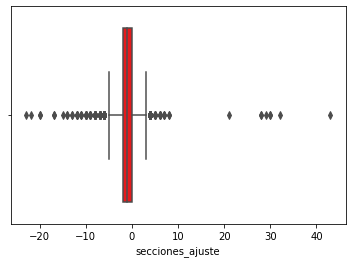

In [14]:
sns.boxplot(x="secciones_ajuste",data=base_subset,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

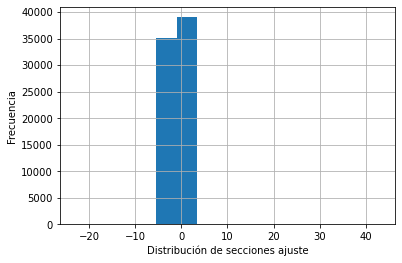

In [15]:
base_subset['secciones_ajuste'].hist(bins=15) 
plt.xlabel("Distribución de secciones ajuste")
plt.ylabel("Frecuencia")
plt.show()

## DISTRIBUCIÓN PARA PRIMARIA

In [16]:
#Intervalo de diferencia de ajuste por grado
    
import math

base_subset = base.loc[base['niv_mod']=="B0"] 
# Mayormente faltan muchas secciones. Promedio: de -15 a -1.5 secciones faltantes. Hay outliers importantes

k = 1 + 3.322 * math.log10(len(base_subset['secciones_ajuste']))
periodos = math.ceil(k)

inf = base_subset['secciones_ajuste'].min()        # Limite inferior del primer intervalo
dif = base_subset['secciones_ajuste'].max()
sup = base_subset['secciones_ajuste'].max()        # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(base_subset['secciones_ajuste'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[-55.0, -41.64705882352941)",3,-48.323529,-55.000000,-41.647059
"[-41.64705882352941, -28.294117647058822)",8,-34.970588,-41.647059,-28.294118
"[-28.294117647058822, -14.941176470588232)",40,-21.617647,-28.294118,-14.941176
"[-14.941176470588232, -1.588235294117645)",69971,-8.264706,-14.941176,-1.588235
"[-1.588235294117645, 11.764705882352942)",19358,5.088235,-1.588235,11.764706
"[11.764705882352942, 25.117647058823536)",7,18.441176,11.764706,25.117647
"[25.117647058823536, 38.470588235294116)",1,31.794118,25.117647,38.470588
"[38.470588235294116, 51.82352941176471)",1,45.147059,38.470588,51.823529
"[51.82352941176471, 65.1764705882353)",1,58.500000,51.823529,65.176471


<AxesSubplot:xlabel='secciones_ajuste'>

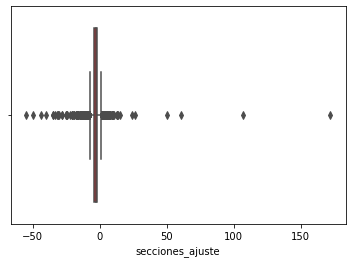

In [17]:
sns.boxplot(x="secciones_ajuste",data=base_subset,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

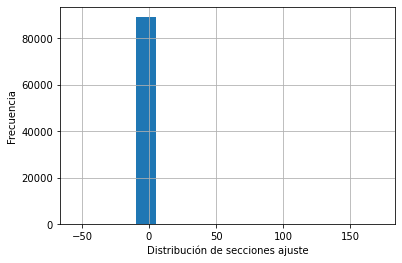

In [18]:
base_subset['secciones_ajuste'].hist(bins=15) 
plt.xlabel("Distribución de secciones ajuste")
plt.ylabel("Frecuencia")
plt.show()

## DISTRIBUCIÓN PARA SECUNDARIA 

In [19]:
#Intervalo de diferencia de ajuste por grado
    
import math

base_subset = base.loc[base['niv_mod']=="F0"] 
# De -3.5 a 3.5 secciones adicionales. Mayormente faltan, pero solo ligeramente. Hay outliers importantes

k = 1 + 3.322 * math.log10(len(base_subset['secciones_ajuste']))
periodos = math.ceil(k)

inf = base_subset['secciones_ajuste'].min()        # Limite inferior del primer intervalo
dif = base_subset['secciones_ajuste'].max()
sup = base_subset['secciones_ajuste'].max()        # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(base_subset['secciones_ajuste'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[-53.0, -45.93333333333334)",1,-49.466667,-53.000000,-45.933333
"[-45.93333333333334, -38.86666666666667)",1,-42.400000,-45.933333,-38.866667
"[-38.86666666666667, -31.8)",8,-35.333333,-38.866667,-31.800000
"[-31.8, -24.733333333333334)",11,-28.266667,-31.800000,-24.733333
"[-24.733333333333334, -17.66666666666667)",31,-21.200000,-24.733333,-17.666667
"[-17.66666666666667, -10.600000000000001)",89,-14.133333,-17.666667,-10.600000
"[-10.600000000000001, -3.5333333333333314)",1985,-7.066667,-10.600000,-3.533333
"[-3.5333333333333314, 3.5333333333333314)",26135,0.000000,-3.533333,3.533333
"[3.5333333333333314, 10.599999999999994)",672,7.066667,3.533333,10.600000


<AxesSubplot:xlabel='secciones_ajuste'>

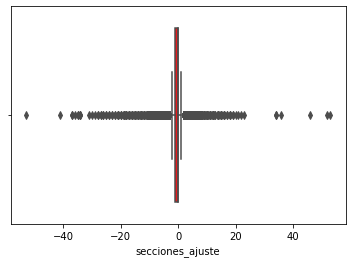

In [20]:
sns.boxplot(x="secciones_ajuste",data=base_subset,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

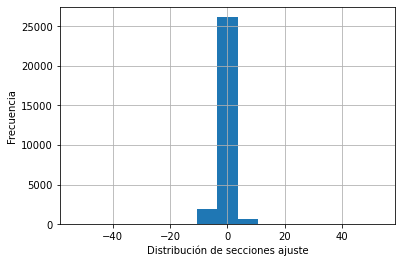

In [21]:
base_subset['secciones_ajuste'].hist(bins=15) 
plt.xlabel("Distribución de secciones ajuste")
plt.ylabel("Frecuencia")
plt.show()

## Observaciones 1:
* Existe un tendencia a tener una cantidad de secciones inferior a la norma.

<AxesSubplot:xlabel='niv_mod', ylabel='count'>

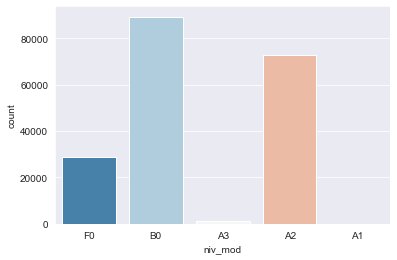

In [22]:
# Histograma de frecuencias para ver las observaciones x código modular:

sns.set_style('darkgrid')
sns.countplot(x='niv_mod',data=base,palette='RdBu_r')

- En promedio, el nivel modular de primaria tiene una mayor brecha de secciones faltantes respecto a los otros niveles modulares. Asimismo, tomar en cuenta que es el nivel modular con más observaciones

<AxesSubplot:xlabel='niv_mod', ylabel='secciones_ajuste'>

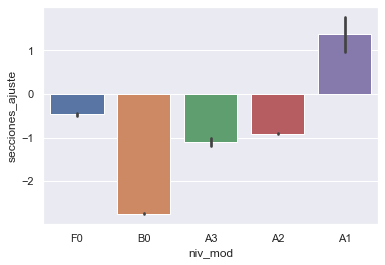

In [23]:
# secciones de ajuste por cod_mod

sns.set_theme(style="darkgrid")
sns.barplot(x='niv_mod', y='secciones_ajuste', data=base)

## ¿Qué SSEE no coincide en req/exd con las secciones?

### 1. Docentes: 
#### Fórmula: secciones necesarias = (docentes nombrados + docentes vacantes) + requerimiento - excedente

,Unnamed: 0,Unnamed: 0.1,cod_mod,codlocal,dir_nom,dir_vac,sub_dir_nom,sub_dir_vac,jer_nom,jer_vac,...,secciones_norma_6,np_secciones_necesarias,secciones_ajuste,doc_exc,np_doc_exc,np_doc_nom,np_doc_vac,np_otro_doc_nom,np_otro_doc_vac,np_req_prof
0,0,0,2212,427658.0,0,0,0,0,0,0,...,0,5,-3,0,-1,3,2,2,0,0
1,1,1,200014,53828.0,0,0,0,0,0,0,...,1,1,-3,0,-2,2,0,0,0,0
2,2,2,200022,53833.0,0,0,0,0,0,0,...,1,1,-4,0,-4,1,0,0,0,0
3,3,3,200030,53847.0,0,0,0,0,0,0,...,1,3,-3,0,-4,2,0,0,0,0
4,4,4,200048,53852.0,0,0,0,0,0,0,...,1,1,-5,0,-4,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192723,192723,64403,1780881,NaN,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,1
192724,192724,64404,1780907,NaN,0,0,0,0,0,0,...,0,1,-2,0,-2,0,0,0,0,1
192725,192725,64405,1780915,NaN,0,0,0,0,0,0,...,0,1,-1,0,-1,0,0,0,0,1
192726,192726,64406,1780964,NaN,0,0,0,0,0,0,...,0,2,2,0,2,0,0,0,0,2


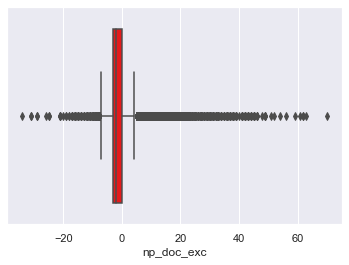

In [24]:
base['doc_exc'] = 0
base['np_doc_exc'] = np.array(base['doc_exc'])
base['np_doc_nom'] = np.array(base['doc_nom'])
base['np_doc_vac'] = np.array(base['doc_vac'])
base['np_otro_doc_nom'] = np.array(base['otro_doc_nom'])
base['np_otro_doc_vac'] = np.array(base['otro_doc_vac'])
base['np_req_prof'] = np.array(base['req_prof'])

base['np_doc_exc'] = base['np_doc_nom'] + base['np_doc_vac'] + base['np_otro_doc_nom'] + base['np_otro_doc_vac'] + base['np_req_prof'] - base['np_secciones_norma']
#base['doc_exc'].value_counts()

sns.boxplot(x="np_doc_exc",data=base,saturation=1.2,width=0.8,fliersize=5,palette="Set1")
base

- Tiende a haber una falta de docentes más que tener excedentes

In [25]:
#Intervalo de diferencia para excedentes de docentes
    
import math

k = 1 + 3.322 * math.log10(len(base['np_doc_exc']))
periodos = math.ceil(k)

inf = base['np_doc_exc'].min()        # Limite inferior del primer intervalo
dif = base['np_doc_exc'].max()
sup = base['np_doc_exc'].max()        # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(base['np_doc_exc'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[-34.0, -28.22222222222222)",5,-31.111111,-34.000000,-28.222222
"[-28.22222222222222, -22.444444444444443)",3,-25.333333,-28.222222,-22.444444
"[-22.444444444444443, -16.666666666666668)",13,-19.555556,-22.444444,-16.666667
"[-16.666666666666668, -10.88888888888889)",61,-13.777778,-16.666667,-10.888889
"[-10.88888888888889, -5.111111111111111)",352,-8.000000,-10.888889,-5.111111
"[-5.111111111111111, 0.6666666666666643)",146730,-2.222222,-5.111111,0.666667
"[0.6666666666666643, 6.444444444444443)",41184,3.555556,0.666667,6.444444
"[6.444444444444443, 12.222222222222221)",3150,9.333333,6.444444,12.222222
"[12.222222222222221, 18.0)",645,15.111111,12.222222,18.000000


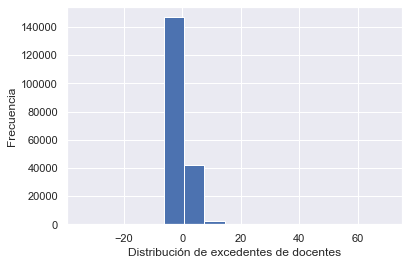

In [26]:
base['np_doc_exc'].hist(bins=15) 
plt.xlabel("Distribución de excedentes de docentes")
plt.ylabel("Frecuencia")
plt.show()

<AxesSubplot:xlabel='niv_mod', ylabel='np_doc_exc'>

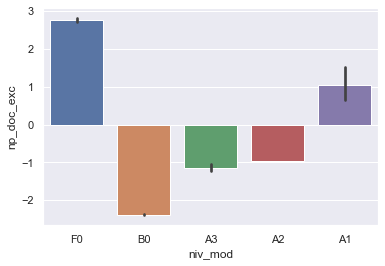

In [27]:
# Excedente de docentes por niv_mod

sns.set_theme(style="darkgrid")
sns.barplot(x='niv_mod', y='np_doc_exc', data=base)

### 2. Auxiliares de educación

#### Inicial: por cada 2 secciones -> 1 auxiliar de educación
#### Primaria: no hay
#### Secundaria: por cada 8 secciones -> 1 auxiliar de educación
#### Fórmula: aux_norma = auxiliares_nombrados + auxiliares vacantes + requerimiento - excedente

<AxesSubplot:xlabel='np_aux_exc'>

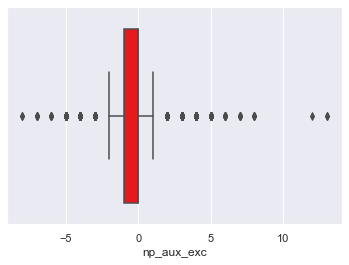

In [28]:
base['aux_norma']=0
base['np_aux_norma'] = np.array(base['aux_norma'])
base['np_aux_nom'] = np.array(base['aux_nom'])
base['np_aux_vac'] = np.array(base['aux_vac'])
base['np_req_aux'] = np.array(base['req_aux'])

base.loc[(base['niv_mod']=="F0"), 'np_aux_norma' ] = base['np_secciones_norma'] / 8
base.loc[((base['niv_mod']=="A1")|(base['niv_mod']=="A2")|(base['niv_mod']=="A3")), 'np_aux_norma'] = base['np_secciones_norma'] / 2
base[f'np_aux_norma'] = base[f'np_aux_norma'].apply(lambda X: int(math.ceil(X)))

base['np_aux_exc'] = base['np_aux_nom'] + base['np_aux_vac'] + base['np_req_aux'] - base['np_aux_norma']
sns.boxplot(x="np_aux_exc",data=base,saturation=1.2,width=0.8,fliersize=5,palette="Set1")


In [29]:
#Intervalo de diferencia para excedentes de docentes
    
import math

k = 1 + 3.322 * math.log10(len(base['np_aux_exc']))
periodos = math.ceil(k)

inf = base['np_aux_exc'].min()        # Limite inferior del primer intervalo
dif = base['np_aux_exc'].max()
sup = base['np_aux_exc'].max()        # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(base['np_aux_exc'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[-8.0, -6.833333333333333)",7,-7.416667,-8.000000,-6.833333
"[-6.833333333333333, -5.666666666666666)",5,-6.250000,-6.833333,-5.666667
"[-5.666666666666666, -4.5)",35,-5.083333,-5.666667,-4.500000
"[-4.5, -3.333333333333333)",113,-3.916667,-4.500000,-3.333333
"[-3.333333333333333, -2.166666666666666)",575,-2.750000,-3.333333,-2.166667
"[-2.166666666666666, -1.0)",39500,-1.583333,-2.166667,-1.000000
"[-1.0, 0.16666666666666785)",145627,-0.416667,-1.000000,0.166667
"[0.16666666666666785, 1.333333333333334)",6440,0.750000,0.166667,1.333333
"[1.333333333333334, 2.5)",268,1.916667,1.333333,2.500000


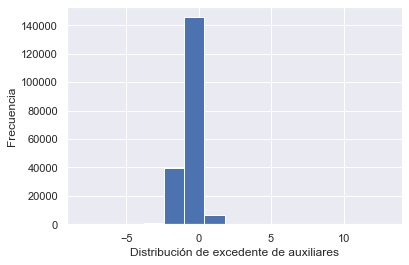

In [30]:
base['np_aux_exc'].hist(bins=15) 
plt.xlabel("Distribución de excedente de auxiliares")
plt.ylabel("Frecuencia")
plt.show()

- Tiende a haber una falta de auxiliares más que tener excedentes

<AxesSubplot:xlabel='niv_mod', ylabel='np_aux_exc'>

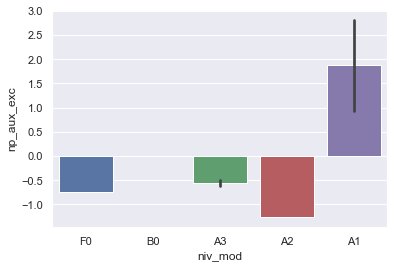

In [31]:
# Excedente de auxiliares por niv_mod

sns.barplot(x='niv_mod', y='np_aux_exc', data=base)

- Solo existe un excedente de auxiliares en el nivel inicial A1

### 3. Jerárquicos

#### Solo para secundaria JER:

#### Por cada 15 secciones: 1 coordinador académico + 1 coordinador pedagógico
#### Por cada 20 secciones: 1 jefe de laboratorio + 1 jefe de taller

<AxesSubplot:xlabel='np_jer_exc'>

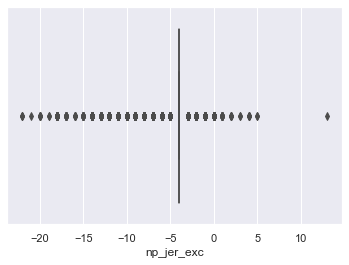

In [52]:
base['np_jer_nom'] = np.array(base['jer_nom'])
base['np_jer_vac'] = np.array(base['jer_vac'])
#
base['jer_norma_20'] = (base['np_secciones_norma']) / 20 
base[f'jer_norma_20'] = base[f'jer_norma_20'].apply(lambda X: int(math.ceil(X)))
base['jer_norma_20'] = base['jer_norma_20']*2

base['jer_norma_15'] = (base['np_secciones_norma']) / 15
base[f'jer_norma_15'] = base[f'jer_norma_15'].apply(lambda X: int(math.ceil(X)))
base['jer_norma_15'] = base['jer_norma_15']*2

base['np_jer_norma'] = base['jer_norma_20'] + base['jer_norma_15']

base.loc[base['jec'] == "jec" , 'jer_norma' ] = 0 ## Jerárquicos es solo para JER
base.loc[base['niv_mod'] != "F0", 'jer_norma'] = 0 ## Jerárquicos es solo para secundaria

base['np_jer_exc'] = base['np_jer_nom'] + base['np_jer_vac'] - base['np_jer_norma']

sns.boxplot(x="np_jer_exc",data=base,saturation=1.2,width=0.8,fliersize=5,palette="Set1") 

In [53]:
#Intervalo de diferencia para excedentes de jerárquicos
    
import math

k = 1 + 3.322 * math.log10(len(base['np_jer_exc']))
periodos = math.ceil(k)

inf = base['np_jer_exc'].min()        # Limite inferior del primer intervalo
dif = base['np_jer_exc'].max()
sup = base['np_jer_exc'].max()        # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(base['np_jer_exc'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[-22.0, -20.055555555555557)",4,-21.027778,-22.000000,-20.055556
"[-20.055555555555557, -18.11111111111111)",8,-19.083333,-20.055556,-18.111111
"[-18.11111111111111, -16.166666666666668)",42,-17.138889,-18.111111,-16.166667
"[-16.166666666666668, -14.222222222222221)",22,-15.194444,-16.166667,-14.222222
"[-14.222222222222221, -12.277777777777779)",270,-13.250000,-14.222222,-12.277778
"[-12.277777777777779, -10.333333333333334)",300,-11.305556,-12.277778,-10.333333
"[-10.333333333333334, -8.38888888888889)",1299,-9.361111,-10.333333,-8.388889
"[-8.38888888888889, -6.444444444444445)",4317,-7.416667,-8.388889,-6.444444
"[-6.444444444444445, -4.5)",5029,-5.472222,-6.444444,-4.500000


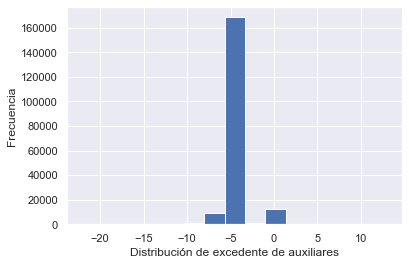

In [54]:
base['np_jer_exc'].hist(bins=15) 
plt.xlabel("Distribución de excedente de auxiliares")
plt.ylabel("Frecuencia")
plt.show()

- Es el único puesto que, en promedio, posee un excedente nulo

### 4. Directores

#### 1 director por cada codlocal
#### Fórmula: dir_norma = directores nombrados + directores vacantes + requerimiento - excedente

In [71]:
# Primero, voy a hacer un collapse sobre la base, para trabajarlo a nivel de local educativo:

base['vraem_d'] = 1
base.loc[(base['vraem']=="No Vraem"), 'vraem_d' ] = 0

base['frontera_d'] = 1
base.loc[(base['frontera']=="No frontera"), 'frontera_d' ] = 0

base['ruralidad_d'] = 0
base.loc[(base['ruralidad']=="Rural 1"), 'ruralidad_d' ] = 3
base.loc[(base['ruralidad']=="Rural 2"), 'ruralidad_d' ] = 2
base.loc[(base['ruralidad']=="Rural 3"), 'ruralidad_d' ] = 1

base['bilingue_d'] = 1
base.loc[(base['bilingue']=="No bilingue"), 'bilingue_d' ] = 0

base_collapse = base.groupby(['codlocal'])[['dir_nom','dir_vac','req_dir','doc_nom','doc_vac','doc_exc','secciones_norma','secciones_ajuste','sub_dir_nom','sub_dir_vac','req_sub','np_doc_exc','np_aux_exc','np_jer_exc','vraem_d','frontera_d','ruralidad_d','bilingue_d']].agg(['sum']).reset_index()

<AxesSubplot:xlabel='np_dir_exc'>

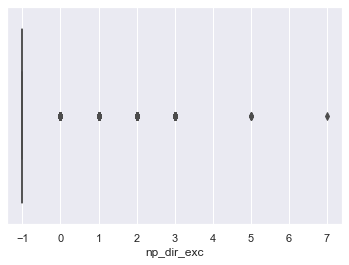

In [72]:
base_collapse['dir_norma'] = 1# 1 por codlocal
base_collapse['np_dir_norma'] = np.array(base_collapse['dir_norma'])
base_collapse['np_dir_nom'] = np.array(base_collapse['dir_nom'])
base_collapse['np_dir_vac'] = np.array(base_collapse['dir_vac'])
base_collapse['np_req_dir'] = np.array(base_collapse['req_dir'])
#base_collapse.head()

#temp = (base_collapse['cod_mod'] == "S150205" ) ## Un código no permitía convertir
#base_collapse = base_collapse.loc[~temp]

#base_collapse['cod_mod'] = base_collapse['cod_mod'].fillna(0).astype(int)
base_collapse = base_collapse.astype(np.int8)
base_collapse[f'np_dir_exc_part1'] = base_collapse['np_dir_nom'] + base_collapse['np_dir_vac'] + base_collapse['np_req_dir'] 
base_collapse['np_dir_exc'] = base_collapse[f'np_dir_exc_part1']- base_collapse['np_dir_norma']

del base_collapse['np_dir_exc_part1'] 
import gc
gc.collect()

sns.boxplot(x="np_dir_exc",data=base_collapse,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

In [73]:
#Intervalo de diferencia para excedentes de directores
    
import math

k = 1 + 3.322 * math.log10(len(base_collapse['np_dir_exc']))
periodos = math.ceil(k)

inf = base_collapse['np_dir_exc'].min()        # Limite inferior del primer intervalo
dif = base_collapse['np_dir_exc'].max()
sup = base_collapse['np_dir_exc'].max()        # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(base_collapse['np_dir_exc'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[-1.0, -0.5)",41867,-0.75,-1.0,-0.5
"[-0.5, 0.0)",0,-0.25,-0.5,0.0
"[0.0, 0.5)",1044,0.25,0.0,0.5
"[0.5, 1.0)",0,0.75,0.5,1.0
"[1.0, 1.5)",9234,1.25,1.0,1.5
"[1.5, 2.0)",0,1.75,1.5,2.0
"[2.0, 2.5)",58,2.25,2.0,2.5
"[2.5, 3.0)",0,2.75,2.5,3.0
"[3.0, 3.5)",978,3.25,3.0,3.5


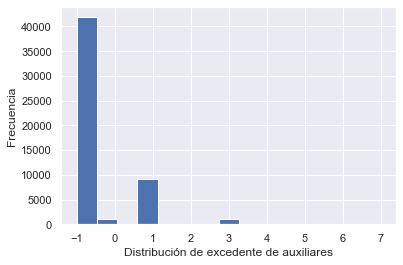

In [74]:
base_collapse['np_dir_exc'].hist(bins=15) 
plt.xlabel("Distribución de excedente de auxiliares")
plt.ylabel("Frecuencia")
plt.show()

### 5. Subdirectores

#### Se asigna 1 subdirector cada 20 docentes. Si existe docentes < 10, no les corresponde subdirector.
#### Esto a nivel de código de local, no codmod

In [75]:
base_collapse['np_sub_dir_nom'] = np.array(base_collapse['sub_dir_nom'])
base_collapse['np_sub_dir_vac'] = np.array(base_collapse['sub_dir_vac'])
base_collapse['np_req_sub'] = np.array(base_collapse['req_sub'])
base_collapse['np_doc_nom'] = np.array(base_collapse['doc_nom'])
base_collapse['np_doc_vac'] = np.array(base_collapse['doc_vac'])

base_collapse['np_doc_ajuste'] = base_collapse['np_doc_nom'] + base_collapse['np_doc_vac']
#base_collapse.info()

#base_collapse.loc[base_collapse['doc_exc']>0, 'doc_ajuste' ] = 'secciones_norma'

#temp = (base_collapse['doc_exc']>0 ) 
#base_collapse = base_collapse.loc[~temp]

#base_temp = base_collapse.loc[base_collapse['doc_exc']>0 , 'doc_ajuste'].to_list()
#base_collapse2 = base_collapse.loc[base_collapse['doc_ajuste'].isin(base_temp)]


base_collapse['np_sub_norma'] = (base_collapse['np_doc_ajuste']) / 20
base_collapse.loc[base_collapse['np_doc_ajuste'] < 10 , 'np_sub_norma' ] = 0

#base.replace([np.inf, -np.inf],np.nan, inplace=True) 
#base[base[f'secciones_norma_{x}'] == inf] = 0
#base[f'secciones_norma_{x}'] = base[f'secciones_norma_{x}'].fillna(0)
##base_collapse[f'sub_norma'] = base_collapse[f'sub_norma'].apply(lambda X: int(math.ceil(X)))

base_collapse[f'np_sub_norma'] = base_collapse[f'np_sub_norma'].apply(lambda X: int(math.ceil(X)))
base_collapse['np_sub_norma'] = base_collapse['np_sub_norma'].astype(np.int8)  

base_collapse['np_sub_exc'] = base_collapse['np_sub_dir_nom'] + base_collapse['np_sub_dir_vac'] + base_collapse['np_req_sub'] - base_collapse['np_sub_norma']

#base_collapse['sub_exc_p1'] = base_collapse['sub_exc_p1'].astype(np.int8) 
#base_collapse['sub_exc_p2'] = base_collapse['sub_exc_p1'] + base_collapse['req_sub'] ## - base_collapse['sub_norma']
#base_collapse['sub_exc_p2'] = base_collapse['sub_exc_p2'].astype(np.int8)  
#del base_collapse['sub_exc_p11']
#gc.collect()
#base_collapse['sub_exc'] = base_collapse['sub_exc_p2'] - base_collapse['sub_norma']
#del base_collapse['sub_exc_p2']
#gc.collect()

base_collapse



,codlocal,dir_nom,dir_vac,req_dir,doc_nom,doc_vac,doc_exc,secciones_norma,secciones_ajuste,sub_dir_nom,...,np_req_dir,np_dir_exc,np_sub_dir_nom,np_sub_dir_vac,np_req_sub,np_doc_nom,np_doc_vac,np_doc_ajuste,np_sub_norma,np_sub_exc
,,sum,sum,sum,sum,sum,sum,sum,sum,sum,...,,,,,,,,,,
0,19,2,0,0,18,2,0,0,0,0,...,0,1,0,0,2,18,2,20,1,1
1,24,2,0,0,19,1,0,0,0,0,...,0,1,0,0,1,19,1,20,1,0
2,38,2,0,0,8,0,0,0,-1,0,...,0,1,0,0,0,8,0,8,0,0
3,43,0,0,0,2,0,0,0,4,0,...,0,-1,0,0,0,2,0,2,0,0
4,57,2,0,0,6,2,0,0,-1,0,...,0,1,0,0,0,6,2,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53181,-37,2,0,0,18,34,0,0,-19,0,...,0,1,0,4,0,18,34,52,3,1
53182,-114,0,0,0,0,6,0,0,-1,0,...,0,-1,0,0,0,0,6,6,0,0
53183,-57,0,0,0,2,4,0,0,-6,0,...,0,-1,0,0,0,2,4,6,0,0


<AxesSubplot:xlabel='np_sub_exc'>

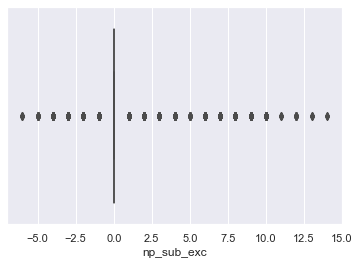

In [76]:
sns.boxplot(x="np_sub_exc",data=base_collapse,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

In [77]:
#Intervalo de diferencia para excedentes de directores
    
import math

k = 1 + 3.322 * math.log10(len(base_collapse['np_sub_exc']))
periodos = math.ceil(k)

inf = base_collapse['np_sub_exc'].min()        # Limite inferior del primer intervalo
dif = base_collapse['np_sub_exc'].max()
sup = base_collapse['np_sub_exc'].max()        # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(base_collapse['np_sub_exc'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

# Se tiene mayoritariamente un excedente negativo (falta) de subdirectores mínima

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[-6.0, -4.75)",22,-5.375,-6.00,-4.75
"[-4.75, -3.5)",81,-4.125,-4.75,-3.50
"[-3.5, -2.25)",240,-2.875,-3.50,-2.25
"[-2.25, -1.0)",1255,-1.625,-2.25,-1.00
"[-1.0, 0.25)",50373,-0.375,-1.00,0.25
"[0.25, 1.5)",715,0.875,0.25,1.50
"[1.5, 2.75)",139,2.125,1.50,2.75
"[2.75, 4.0)",57,3.375,2.75,4.00
"[4.0, 5.25)",45,4.625,4.00,5.25


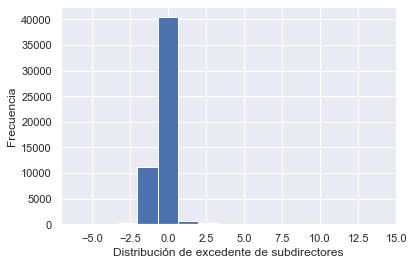

In [78]:
base_collapse['np_sub_exc'].hist(bins=15) 
plt.xlabel("Distribución de excedente de subdirectores")
plt.ylabel("Frecuencia")
plt.show()

## Matriz de Correlaciones

In [82]:
#Ajuste de la suma
#base_collapse.loc[base_collapse['vraem_d']>0, 'vraem_d' ] = 1
#base_collapse.loc[base_collapse['frontera_d']>0, 'frontera_d' ] = 1
#base_collapse.loc[base_collapse['bilingue_d']>0, 'bilingue_d' ] = 1

base_corr = base_collapse[["np_doc_exc", "np_aux_exc", "np_jer_exc", "np_dir_exc", "np_sub_exc", "vraem_d", "frontera_d", "bilingue_d", "ruralidad_d", "secciones_ajuste"]]
base_corr.head()

# No Vraem
# No frontera
# No bilingue
# Rural 3, Rural 2, Rural 1

,np_doc_exc,np_aux_exc,np_jer_exc,np_dir_exc,np_sub_exc,vraem_d,frontera_d,bilingue_d,ruralidad_d,secciones_ajuste
,sum,sum,sum,,,sum,sum,sum,sum,sum
0,0,0,-8,1,1,0,0,0,0,0
1,0,0,-8,1,0,0,0,0,0,0
2,-3,-2,-8,1,0,0,0,0,0,-1
3,2,1,0,-1,0,0,0,0,2,4
4,-3,-2,-8,1,0,0,0,0,0,-1


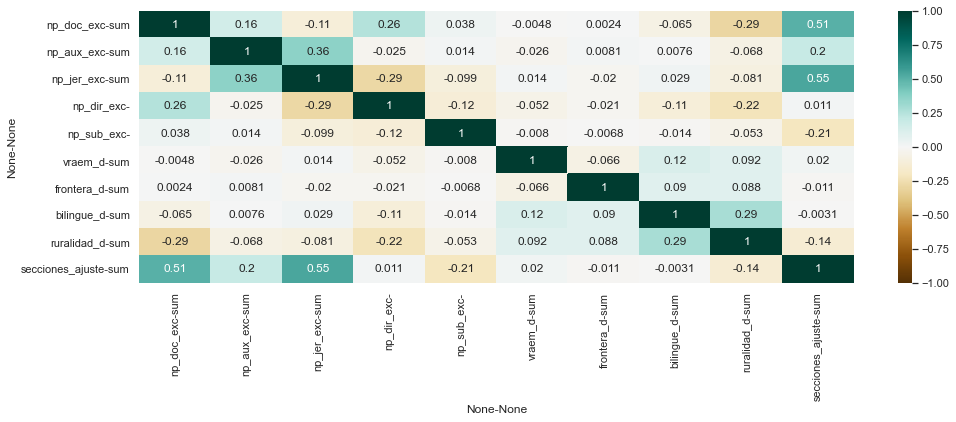

In [90]:
#data = {'A': [45,37,42,35,39],
#        'B': [38,31,26,28,33],
#        'C': [10,15,17,21,12]
#        }

#df_corr = pd.DataFrame(df_corr)

# corrMatrix = df.corr()
plt.figure(figsize=(16,5))
sns.heatmap(base_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

- Existe una alta correlación directa entre las IIEE que tienen excedente de docentes y secciones
- Existe una alta correlación directa entre las IIEE que tienen excedente de puestos jerárquicos y secciones
- Existe una alta correlación directa entre las IIEE con alto gradiente de ruralidad y poseer EIB
- Existe una correlación entre tener un alto gradiente de ruralidad y tener un excedente negativo (falta) de docentes y directores. 
- En general, los locales educativos rurales tienden a tener una mayor falta de todos los puestos presentados en la norma de racionalización. Asimismo, tienen a poseer características de vulenerabilidad (son de zona vraem, frontera o de EIB)
